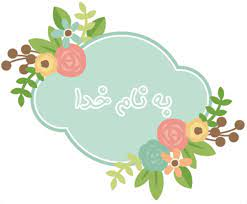

<center> NLP </center>
<center> HW-2 </center>
<br>
<center> Text Preprocessing </center>

Selected text is from English.
<br>It is Friends series dialogues.
<br>Used link as a source is: https://fangj.github.io/friends/

# Export data from the github repository:

In [125]:
import urllib.request as urllib
import re
import matplotlib.pyplot as plt
import nltk
import pandas as pd 
from nltk import word_tokenize

# Read and struct data

In [4]:
firstpartofurl = 'https://fangj.github.io/friends/season/'
secondpartofurl = {}
secondpartofurl[1] = list(range(101,125))
secondpartofurl[2] = list(range(201,225))
secondpartofurl[3] = list(range(301,326))
secondpartofurl[4] = list(range(401,424))
secondpartofurl[5] = list(range(501,524))
secondpartofurl[6] = list(range(601,625))
secondpartofurl[7] = list(range(701,725))
secondpartofurl[8] = list(range(801,824))
secondpartofurl[9] = list(range(901,923))
secondpartofurl[10] = list(range(1001,1017))

name_actors = ['Rachel','Chandler','Joey','Monica','Ross','Phoebe']

In [106]:
speaker_names = []

data_based_on_season_and_user = {}
data_based_on_season_and_user["Rachel"] = []
data_based_on_season_and_user["Chandler"] = []
data_based_on_season_and_user["Joey"] = []
data_based_on_season_and_user["Monica"] = []
data_based_on_season_and_user["Ross"] = []
data_based_on_season_and_user["Phoebe"] = []
t = f = 0
for season in range(1,11):
    print(" season = " ,season)
    for i in secondpartofurl[season]:
      if i<1000:
        url = firstpartofurl+'0'+str(i)+'.html'
      else:
        url = firstpartofurl+str(i)+'.html'
      
      try:
        data = urllib.urlopen(url)
      except:
        print("not found ",url)
      
      
      for line in data: # files are iterable
        try:
          sline = line.decode("utf-8")
        except:
          continue

        try:
          if '<p><b>' in sline:
              user = re.findall('[a-zA-Z]+:</b>',sline)
              note = re.findall('</b>.+',sline)
              user = user[0]
              note = note[0]
              try:
                data_based_on_season_and_user[user[:-5]].append(note[4:-4])
              except:
                if user[:-5] not in speaker_names:
                  speaker_names.append(user[:-5])
          t+=1
        except:
          f+=1
          # pass
print(t,f)

 season =  1
 season =  2
not found  https://fangj.github.io/friends/season/0212.html
not found  https://fangj.github.io/friends/season/0213.html
 season =  3
 season =  4
 season =  5
 season =  6
not found  https://fangj.github.io/friends/season/0615.html
not found  https://fangj.github.io/friends/season/0616.html
 season =  7
not found  https://fangj.github.io/friends/season/0724.html
 season =  8
 season =  9
 season =  10
155715 643


In [110]:
speaker_names

['Agent',
 'Alan',
 'Alex',
 'Alice',
 'All',
 'Allesandro',
 'Amanda',
 'Anchorwoman',
 'Andrea',
 'Angela',
 'Annabelle',
 'Announcer',
 'Ashford',
 'Ashley',
 'Attendant',
 'Aurora',
 'Baldhara',
 'Ballerina',
 'Bandleader',
 'Barber',
 'Barry',
 'Bastard',
 'Ben',
 'Bernice',
 'Billy',
 'Bing',
 'Birth',
 'Bitch',
 'Bob',
 'Bobby',
 'Bonnie',
 'Boss',
 'Both',
 'Bowmont',
 'Brenda',
 'Burgin',
 'Burke',
 'Burt',
 'Cailin',
 'Caitlin',
 'Cape',
 'Carl',
 'Carol',
 'Casey',
 'Cashier',
 'Cassie',
 'Cecilia',
 'Celia',
 'Chandlers',
 'Charlie',
 'Chatracus',
 'Chip',
 'Chloe',
 'Clark',
 'Claudia',
 'Cleaner',
 'Clerk',
 'Cliff',
 'Collins',
 'Commercial',
 'Conductor',
 'Connelly',
 'Cookie',
 'Cop',
 'Cowgirl',
 'Critic',
 'Croupier',
 'Croupler',
 'Crystal',
 'Customer',
 'Cynthia',
 'D',
 'Dan',
 'Dana',
 'Danny',
 'Date',
 'Daughter',
 'Dave',
 'David',
 'Dealer',
 'Devon',
 'Dina',
 'Director',
 'Dirk',
 'Doctor',
 'Don',
 'Doug',
 'Drag',
 'Drake',
 'Drew',
 'E',
 'Earl',
 'Eld

In [17]:
print("percentage of exported info" , round(149208/(149208+7150)*100,2))

percentage of exported info 95.43


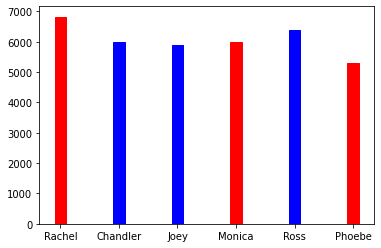

In [33]:
name = []
val = []
for key in data_based_on_season_and_user.keys():
  name.append(key)
  val.append(len(data_based_on_season_and_user[key]))
  # print(key," : ",len(data_based_on_season_and_user[key]))
p = plt.bar(name,val,width=0.2)
p[0].set_color('r')
p[1].set_color('b')
p[2].set_color('b')
p[3].set_color('r')
p[4].set_color('b')
p[5].set_color('r')
plt.show()

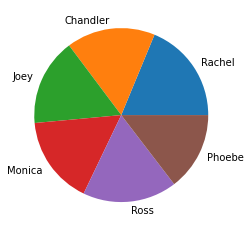

In [34]:
plt.pie(labels=name, x =val)
plt.show()

#preprocessing

In [119]:
'''remove un-alphabetic characters / here we remove punctuation  marks too'''
# based of stackoverflow
def remove_non_alphabetic(note):
  regex = re.compile('[^a-zA-Z]')
  clear_note = regex.sub(' ', note)
  return clear_note

In [42]:
'''lowercase characters'''
def lower_case_of_list(inlist):
  out = [x.lower() for x in inlist]
  return out

In [80]:
'''clear stopwords and not clear words such as singulars'''
# mainly based on https://github.com/language-ml/1-nlp-exploring-datasets/blob/main/notebooks/
def stopword_removal(note_list):
  try:
    stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
  except:
    nltk.download('stopwords')
    stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]

  out_list = []
  for note in note_list:
    new = ""
    for word in note.split():
      if len(word) != "":
         if word not in stopwords:
            new+=word[:] + " "
    out_list.append(new)
  return out_list
# print(stopword_removal(['how you doing ali','are you ok ali']))

In [118]:
def lol(list_):
    normalized_sents=[[word for word in sentence 
                            if word not in string.punctuation] 
                              for sentence in list_ ]
    return normalized_sents

list_ = ['hi ali i am hear','lol how care?']
print(lol(list_))

[['h', 'i', ' ', 'a', 'l', 'i', ' ', 'i', ' ', 'a', 'm', ' ', 'h', 'e', 'a', 'r'], ['l', 'o', 'l', ' ', 'h', 'o', 'w', ' ', 'c', 'a', 'r', 'e']]


In [111]:
'''  clear_less_than_three which is mostly useless or meaning less '''
def clear_less_than_three(note):
  out = ""
  for word in note.split():
    if len(word)>2:
      out += word+ " "
  return out

In [112]:
alphabetic_dictionary_with_stopwords = {}
alphabetic_dictionary_without_stopwords = {}
for key in data_based_on_season_and_user.keys():
  sub_list_temp = []
  for note in data_based_on_season_and_user[key]:
    non_alph_note = remove_non_alphabetic(note) # remove un-alphabetic characters
    cleared_shorts = clear_less_than_three(non_alph_note)
    sub_list_temp.append(cleared_shorts[:])
   
  sub_list_temp = lower_case_of_list(sub_list_temp)[:] # lowercase
  alphabetic_dictionary_with_stopwords[key] = sub_list_temp[:]
  
  sub_list_temp = stopword_removal(sub_list_temp)
  alphabetic_dictionary_without_stopwords[key] = sub_list_temp[:]

In [141]:
statistics = {}
for name in name_actors:
  f1012 = f13 = d = z1 = z2 = 0
  c1 = 0
  c2 = 0
  for note in alphabetic_dictionary_with_stopwords[name]:
    z1 += len(note.split())
    c1 += 1

  for note in alphabetic_dictionary_without_stopwords[name]:
    z2 += len(note.split())
    for word in note.split():
      d += len(word)
      c2+=1
      if len(word) > 9 and len(word) < 13:
        f1012 +=1
      elif len(word) >= 13:
        f13 +=1
      
      

  
  
  statistics[name] = [round(100 * (z1-z2)/z1,2) , round(z1/c1,2), round(z2/c2,2) , d/c2 , f1012,f13 , round(100*(f1012+f13)/c2,2)]

# print( name ,':' ,end = " ")
'''
print("percentage_of_stop_words",
        "mean lenght of sentences with stop words" , 
        "mean lenght of sentences without stop words",
        "mean lenght of words",
        "number of long words in different size")'''
statistics 

{'Chandler': [39.48, 5.89, 1.0, 5.02741777008375, 386, 41, 2.0],
 'Joey': [38.05, 6.19, 1.0, 4.92187638164294, 307, 28, 1.48],
 'Monica': [40.65, 5.74, 1.0, 5.044573167738451, 335, 19, 1.74],
 'Phoebe': [39.02, 5.95, 1.0, 4.9632246000415545, 335, 28, 1.89],
 'Rachel': [39.06, 5.72, 1.0, 4.927421727253625, 366, 29, 1.66],
 'Ross': [38.65, 5.85, 1.0, 5.04029752789324, 437, 52, 2.14]}

In [142]:
col_name = ['%sw','l+sw','l-sw','lw','f<13','f>=13','%M/M+m']
index_name = ['Chandler','Joey','Monica','Phoebe','Rachel','Ross']
data = [[39.48, 5.89, 1.0, 5.02741777008375, 386, 41, 2],
        [38.05, 6.19, 1.0, 4.92187638164294, 307, 28, 1.48],
        [40.65, 5.74, 1.0, 5.044573167738451, 335, 19, 1.74],
        [39.02, 5.95, 1.0, 4.9632246000415545, 335, 28, 1.89],
        [39.06, 5.72, 1.0, 4.927421727253625, 366, 29, 1.66],
        [38.65, 5.85, 1.0, 5.04029752789324, 437, 52, 2.14]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = col_name,index=index_name)
  
# print dataframe.
df

%sw  l+sw  l-sw        lw  f<13  f>=13  %M/M+m
Chandler  39.48  5.89   1.0  5.027418   386     41    2.00
Joey      38.05  6.19   1.0  4.921876   307     28    1.48
Monica    40.65  5.74   1.0  5.044573   335     19    1.74
Phoebe    39.02  5.95   1.0  4.963225   335     28    1.89
Rachel    39.06  5.72   1.0  4.927422   366     29    1.66
Ross      38.65  5.85   1.0  5.040298   437     52    2.14

In [143]:
for i in range(5):
  print(alphabetic_dictionary_with_stopwords['Rachel'][i])
  print(alphabetic_dictionary_without_stopwords['Rachel'][i])

guess what 
guess 
are you kidding trained for nothing was laughed out 
kidding trained nothing laughed 
you would too you found john and david boots sale 
would found john david boots sale 
they new don need job don need parents 
new need job need parents 
credit card 
credit card 
